In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.activations import linear,relu,sigmoid
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [3]:
tf.random.set_seed(1234) # for consistent results

In [11]:
model=Sequential(
    [
        Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(units=25, activation=relu, name='L1'),
        tf.keras.layers.Dense(units=15, activation=relu, name='L2'),
        tf.keras.layers.Dense(units=10,activation='softmax', name='L3')
    ],name="my_model"
)

In [12]:
print(y_train[:5])
print(y_train.shape)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(60000, 10)


In [17]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    epochs=28,
    validation_split=0.1
)


Epoch 1/28
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7787 - loss: 0.7103 - val_accuracy: 0.9408 - val_loss: 0.2057
Epoch 2/28
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9327 - loss: 0.2310 - val_accuracy: 0.9508 - val_loss: 0.1644
Epoch 3/28
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9460 - loss: 0.1861 - val_accuracy: 0.9563 - val_loss: 0.1465
Epoch 4/28
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9542 - loss: 0.1593 - val_accuracy: 0.9585 - val_loss: 0.1380
Epoch 5/28
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9595 - loss: 0.1410 - val_accuracy: 0.9617 - val_loss: 0.1370
Epoch 6/28
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9640 - loss: 0.1264 - val_accuracy: 0.9615 - val_loss: 0.1366
Epoch 7/28
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9667 - loss: 0.1152 - val_accuracy: 0.9632 - val_loss: 0.1359
Epoch 8/28
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9685 - loss: 0.1056 - 

In [18]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L1 (Dense)                           │ (None, 25)                  │          19,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,527 (236.44 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,352 (157.63 KB)

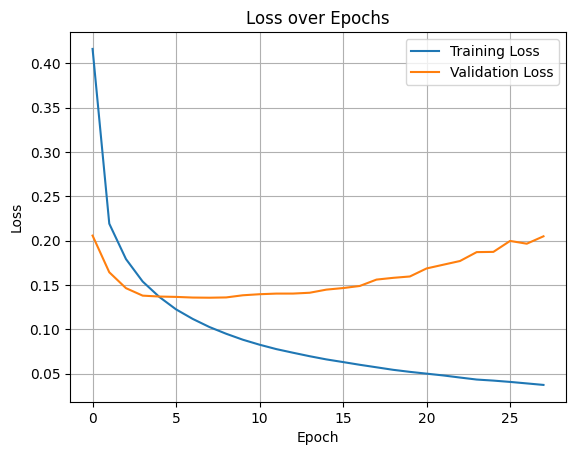

In [19]:
def plot_loss_tf(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_loss_tf(history)

In [20]:
model.save("my_model.h5", include_optimizer=False)

In [22]:
os.makedirs("example_images", exist_ok=True)

# Predict and save 5 example images
for i in range(5):
    img = x_test[i]
    true_label = y_test[i]
    prediction = model.predict(img.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}, Confidence: {confidence:.2f}%")
    plt.axis('off')
    plt.savefig(f"example_images/prediction_{i}.png")
    plt.close()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
